In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import scipy.sparse as sps
from scipy import sparse
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from nilearn import image, surface, plotting, datasets
from tqdm import tqdm
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 

import warnings
warnings.filterwarnings('ignore')

In [2]:
_ = np.array([0, 2, 12, 14, 16, 18, 20, 22, 24, 26, 29, 31, 33, 35, 37, 39, 41, 43, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 4, 5, 6, 7, 8, 9, 10, 11, 28, 45])
# read the fiber name
l_idx = [1,3,13,15,17,19,25,27,30,32,36,38,40,42,44,47,49,51,53,55,57,59,61,63,65,67,69,71]
r_idx = [2,4,14,16,18,24,26,28,31,35,37,39,41,43,45,48,50,52,54,56,58,60,62,64,66,68,70,72]
m_idx = [4,5,6,7,8,9,10,11]
l_idx = np.array(l_idx)
r_idx = np.array(r_idx)
m_idx = np.array(m_idx)
l_idx = l_idx-1
r_idx = r_idx-1
label_f = open('/n02dat01/users/dyli/Grad_data/support_data/fiber_name_ori_nonum_nohemi.txt', 'r')
label_name = label_f.readlines()
label_name = [' '.join([i.strip() for i in price.strip().split('\n')]) for price in label_name]
label_name_lm = [label_name[l_idx[i]] for i in range(len(l_idx))] + [label_name[m_idx[i]] for i in range(len(m_idx))]
print(f'the number of fiber: {len(label_name_lm)}')

new_fiber_idx = []
for fi,ff in enumerate(_):
    if ff in list(l_idx)+list(m_idx): new_fiber_idx.append(fi)
new_fiber_idx = np.array(new_fiber_idx)
print(new_fiber_idx.shape)

the number of fiber: 36
(36,)


# Figure 2A.

The TGC is calculated by figure2_TGC_calculate.py

In [ ]:
import os

import numpy as np
import pandas as pd

import scipy.io as sio
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['ps.usedistiller'] = 'xpdf'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.colors import (ListedColormap, Normalize)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.patches as mpatches

import seaborn as sns
from matplotlib import font_manager
font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
plt.rcParams["font.sans-serif"] = "Arial" 

FIG_DIR = './' # 'C:/Users/User/Desktop/'
FIG_EXT = '.png'
def lineplot(x, y, df, palette=None, title=None, hue=None, hue_order=None, \
             err_style='band', markers=True, marker='D', markersize=12, \
             linewidth=1, sort=False, xlim=None, x_major_loc=None, ylim=None, \
             y_major_loc=None, legend=True, figsize=(15,5), fig_name=None, \
             **kwargs):

     sns.set(style="ticks", font_scale=2.0)

     fig = plt.figure(figsize=figsize, dpi=300)
     ax = plt.subplot(111)

     sns.lineplot(x=x, y=y,
                  data=df,
                  palette=palette,
                  hue=hue,
                  hue_order=hue_order,
                  err_style=err_style, #'band' 'bars'
                  markers=markers,
                  marker=marker,
                  markersize=markersize,
                  linewidth=linewidth,
                  sort=sort,
                  ax=ax,
                  **kwargs
                  )

     if legend: ax.legend(fontsize=20, frameon=False, ncol=1, loc='lower center')
     else: ax.get_legend().remove()

     if title is not None: ax.set_title(title)

     if xlim is not None: ax.set_ylim(xlim)
     if x_major_loc is not None: ax.xaxis.set_major_locator(MultipleLocator(x_major_loc))

     if ylim is not None: ax.set_ylim(ylim)
     if y_major_loc is not None: ax.yaxis.set_major_locator(MultipleLocator(y_major_loc))

     sns.despine(offset=10, trim=True)

     if fig_name is not None: fig.savefig(fname=os.path.join(FIG_DIR, fig_name + FIG_EXT), transparent=True, bbox_inches='tight', dpi=300)

# remove the medial wall
dirc_L = '/n02dat01/users/dyli/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/n02dat01/users/dyli/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

# read the sublist
list_path = '/n02dat01/users/dyli/HCP1200/scripts/HCP_968.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

# read the group MODE
x = np.loadtxt('/n01dat01/dyli/multi/support_code/BrainEigenmodes/data/template_eigenmodes/fsLR_32k_white-lh_emode_200.txt') # (32492, 200)
x = x[select_ind_L,:]

# calculate the pearsonr
corr_numpy = np.zeros((len(namelist), len(label_name_lm)))
for subi,sub in enumerate(namelist):
    corr_numpy[subi, 0:len(label_name_lm)] = np.load(f'/n01dat01/dyli/multi/HCP_1200/{sub}/FP_{sub}_predict_by_200_group_whitemode_deve-mode_pearsonr_L.npy')[new_fiber_idx]

corr_df_HCP = pd.DataFrame(np.squeeze(corr_numpy), index=namelist, columns=label_name_lm)
corr_df = corr_df_HCP

x_list = list(corr_df.columns)
# read the sublist
list_path = '/n02dat01/users/dyli/HCP1200/scripts/HCP_968.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

df = pd.DataFrame(columns=['sub_name', 'fiber', 'exp_name', 'dataset_name', 'Reconstruction accuracy (r)'])
for ii in range(36):
    for sub in range(len(namelist)):
        #add row to end of DataFrame
        df.loc[len(df.index)] = [namelist[sub], x_list[ii], 'HCP1200', 'HCP', np.squeeze(np.array(corr_df_HCP.loc[:,[x_list[ii]]]))[sub]]

# read the sublist
list_path = '/n02dat01/users/dyli/deve_indi_pred/deve_indi_pred_code/sub_list/sub_image_nodc_v3.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

# calculate the pearsonr
corr_numpy = np.zeros(( 3, len(namelist), len(label_name_lm)))
for age_i,age_name in enumerate(['BL','FU2','FU3']):
    for subi,sub in enumerate(namelist):
        corr_numpy[age_i, subi, 0:len(label_name_lm)] = np.load(f'/n02dat01/users/dyli/deve_indi_pred/data/DTI/{age_name}_nodc/{sub}/FP_{sub}_predict_by_200_group_whitemode_deve-mode_pearsonr_L.npy')

corr_df_BL = pd.DataFrame(np.squeeze(corr_numpy[0,...]), index=namelist, columns=label_name_lm)
corr_df_FU2 = pd.DataFrame(np.squeeze(corr_numpy[1,...]), index=namelist, columns=label_name_lm)
corr_df_FU3 = pd.DataFrame(np.squeeze(corr_numpy[2,...]), index=namelist, columns=label_name_lm)
corr_df = pd.concat([corr_df_FU2, corr_df_FU3], axis=0)

for ii in range(36):
    for sub in range(40):
        #add row to end of DataFrame
        df.loc[len(df.index)] = [namelist[sub], x_list[ii], 'BL', 'IMAGEN', np.squeeze(np.array(corr_df_BL.loc[:,[x_list[ii]]]))[sub]]

for ii in range(36):
    for sub in range(40):
        #add row to end of DataFrame
        df.loc[len(df.index)] = [namelist[sub], x_list[ii], 'FU2', 'IMAGEN', np.squeeze(np.array(corr_df_FU2.loc[:,[x_list[ii]]]))[sub]]

for ii in range(36):
    for sub in range(40):
        #add row to end of DataFrame
        df.loc[len(df.index)] = [namelist[sub], x_list[ii], 'FU3', 'IMAGEN', np.squeeze(np.array(corr_df_FU3.loc[:,[x_list[ii]]]))[sub]]

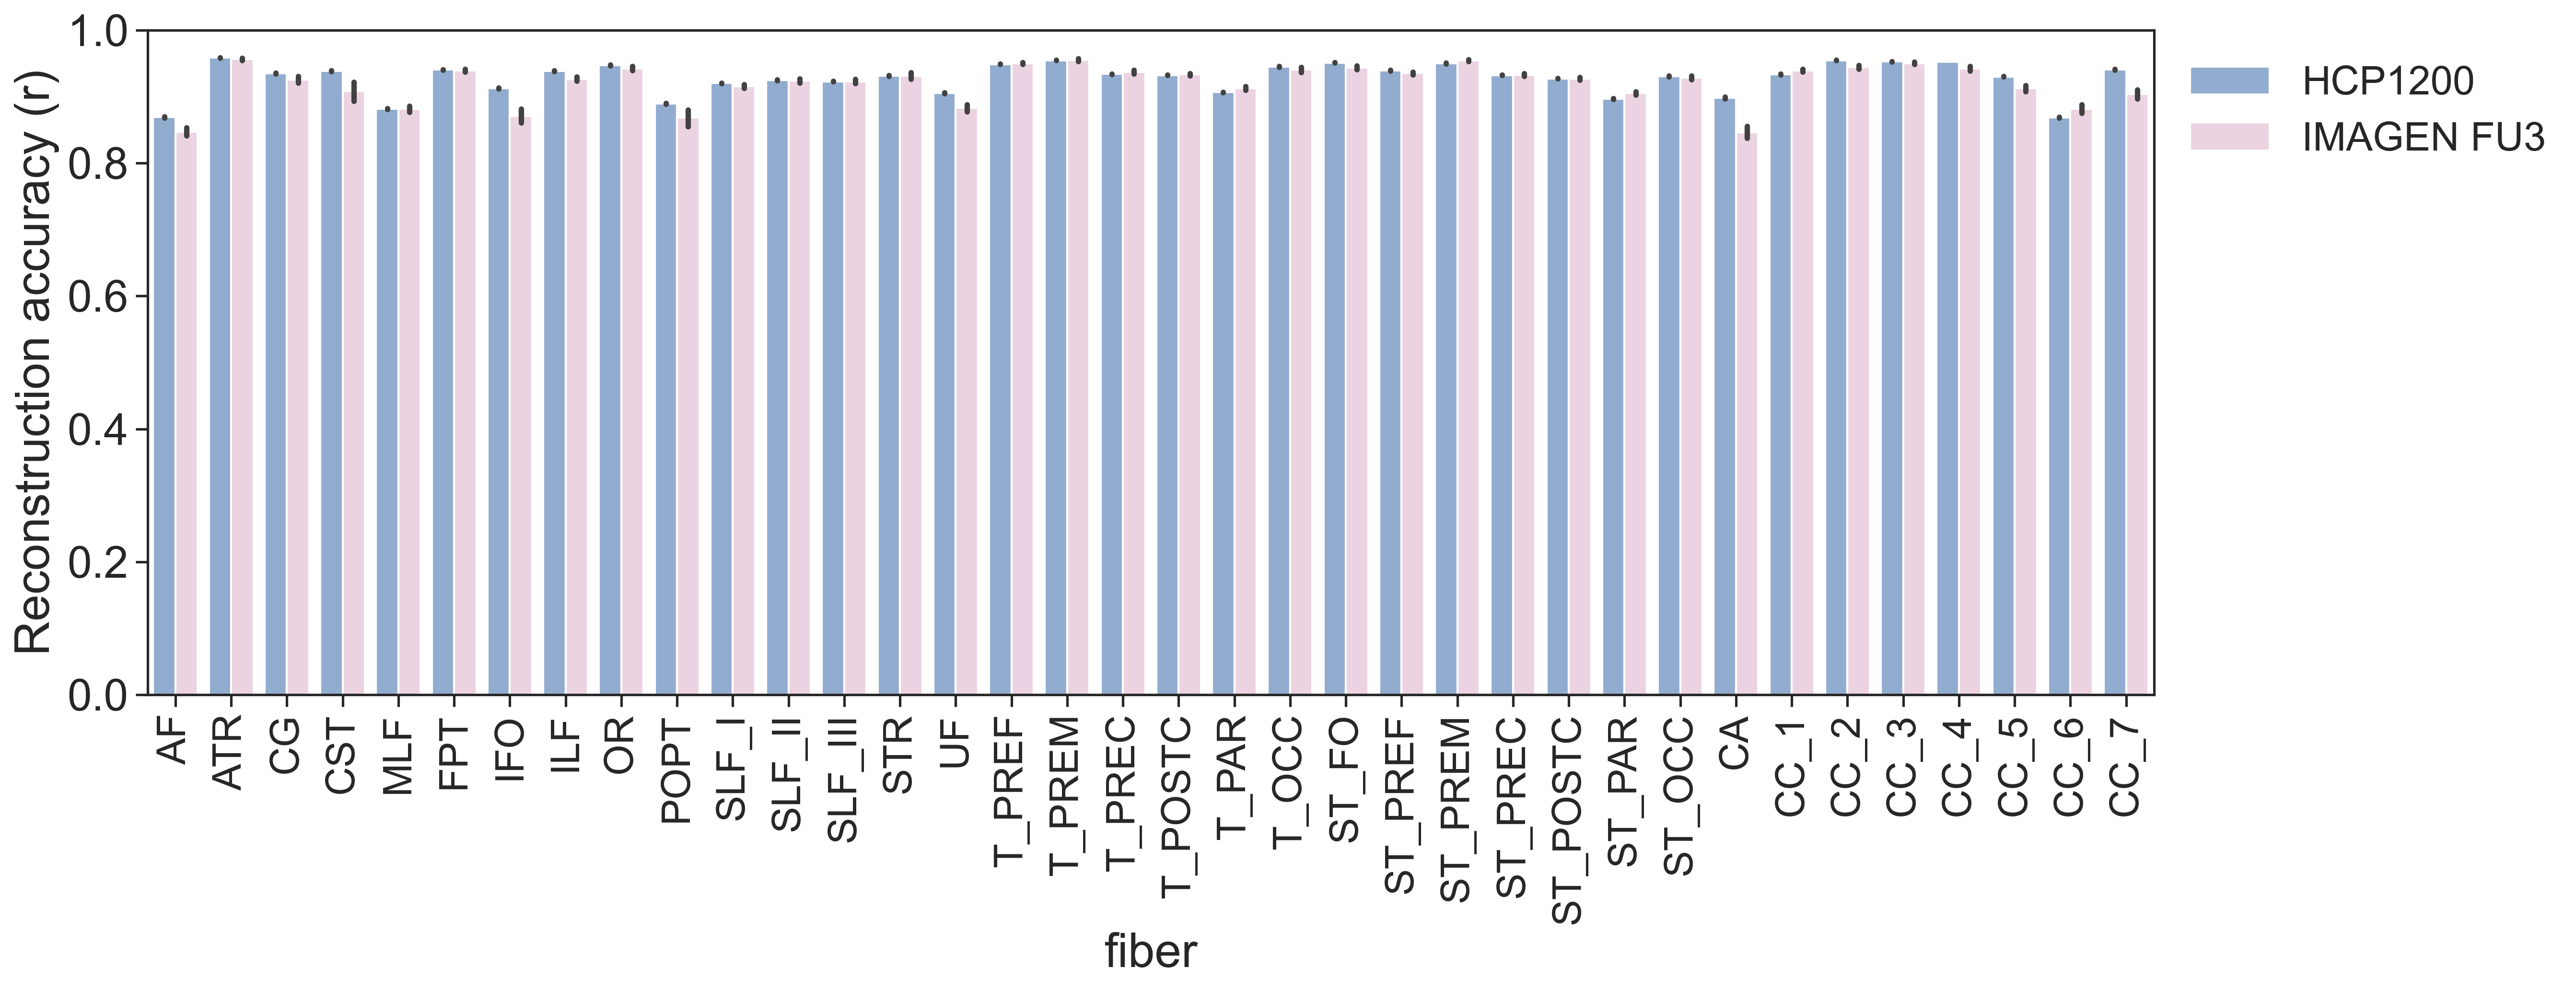

In [13]:
def barplot(x, y, df, palette=None, title=None, hue=None, hue_order=None, \
             err_style='band', markers=True, marker='D', markersize=12, \
             linewidth=1, sort=False, xlim=None, x_major_loc=None, ylim=None, \
             y_major_loc=None, legend=True, figsize=(15,5), fig_name=None, \
             **kwargs):

     sns.set(style="ticks", font_scale=2.0)

     fig = plt.figure(figsize=figsize, dpi=300)
     ax = plt.subplot(111)

     sns.barplot(x=x, y=y,
                  data=df,
                  palette=palette,
                #   facecolor=(0,0,0,0),
                #   linewidth=2,
                #   edgecolor=palette,
                  hue=hue,
                  hue_order=hue_order,
                  ax=ax,
                  **kwargs
                  )
    
     plt.xticks(fontproperties='Arial', fontsize=20, rotation=90)
     plt.legend(loc='upper left',         #设置legend box的某一点为anchor
               bbox_to_anchor=(1,1),        #设置anchor在图像中的位置
               ncol=1,        #legend列数，默认为1
               title=None,        #标题，默认为None
               fontsize=20,        #字体大小
               markerscale=1.5,        # legend中marker相对图中marker的比例, 1表示相同
               markerfirst=True,        #marker是否在前
               borderpad=None,        #float,frame大小,默认为None
               labelspacing=None,        #float,默认为None,图注间的垂直距离
               handlelength=None,        #float,默认为None,图注长度
               handletextpad=None,        #float,默认为None,图注与文字间的距离
               columnspacing=None,        #float,默认None,列之间的距离 
               frameon=False,        #是否要边框
               shadow=False,        #shdow: frameon为True时,legend边框是否有阴影
               framealpha=1,        # frameon为True时,设置frame(底板)的透明度; ; 
               facecolor=None,        #frameon为True时,设置legend box的背景颜色
               edgecolor=None)         # frameon为True时,设置legend box的边框颜色

     #if legend: ax.legend(fontsize=20, frameon=False, ncol=1, loc='lower right')
     #else: ax.get_legend().remove()

     if title is not None: ax.set_title(title)

     if xlim is not None: ax.set_ylim(xlim)
     if x_major_loc is not None: ax.xaxis.set_major_locator(MultipleLocator(x_major_loc))

     if ylim is not None: ax.set_ylim(ylim)
     if y_major_loc is not None: ax.yaxis.set_major_locator(MultipleLocator(y_major_loc))

     #sns.despine(offset=10, trim=True)

     if fig_name is not None: fig.savefig(fname=os.path.join(FIG_DIR, fig_name + FIG_EXT), transparent=True, bbox_inches='tight', dpi=300)

barplot(x='fiber', 
        y='Reconstruction accuracy (r)', 
        df=df, 
        # palette=['#951425', '#14508C'], 
        palette=['#88abda', '#f0cfe3'], 
        hue='exp_name',
        ylim=[0,1],
        fig_name='figure2_Reconstruction accuracy all (white) - bar',
        legend=False,
        figsize=(18,6))

plt.show()
plt.close()

# Figure 2B.

Save the reconstructed tract reachability map in txt files and plot them using workbench.

In [ ]:
# remove the medial wall
dirc_L = '/n02dat01/users/dyli/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/n02dat01/users/dyli/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

# read the sublist
list_path = '/n01dat01/dyli/multi/scripts/data_preprocess/sub_list/HCP_retest.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

# read the group MODE
x = np.loadtxt('/n01dat01/dyli/multi/support_code/BrainEigenmodes/data/template_eigenmodes/fsLR_32k_white-lh_emode_200.txt') # (32492, 200)

exp_name = 'retest'
print(exp_name)

# train a GLM for each sub
for sub in namelist:
    if os.path.exists(f'/n01dat01/dyli/multi/HCP_test_retest/{exp_name}/{sub}/FP_{sub}_predict_by_200_group_whitemode_thr05_para_L.npy'):
        para = np.load(f'/n01dat01/dyli/multi/HCP_test_retest/{exp_name}/{sub}/FP_{sub}_predict_by_200_group_whitemode_thr05_para_L.npy') # (200,36)
        assert para.shape[1] ==36
        for f in range(36):
            fiber_PM_re = np.zeros(32492)
            for mode in range(200):
                fiber_PM_re = fiber_PM_re + para[mode, f] * x[:, mode]
            np.savetxt(f'/n01dat01/dyli/multi/results_data/PM_thr05/HCPrecon_{exp_name}_{sub}_{label_name_lm[f]}_L.txt', fiber_PM_re)

In [ ]:
# remove the medial wall
dirc_L = '/n02dat01/users/dyli/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/n02dat01/users/dyli/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

# read the sublist
list_path = '/n02dat01/users/dyli/deve_indi_pred/deve_indi_pred_code/sub_list/sub_image_nodc_v3.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

# read the group MODE
x = np.loadtxt('/n01dat01/dyli/multi/support_code/BrainEigenmodes/data/template_eigenmodes/FU3_fsLR_32k_white-lh_emode_200.txt') # (32492, 200)

exp_name = 'retest'
print(exp_name)

# train a GLM for each sub
father_path = '/n02dat01/users/dyli/deve_indi_pred/data/DTI/FU3_nodc'
for sub in namelist:
    # FP_000000112288_predict_by_200_group_whitemode_deve-mode_thr05_para_L.npy
    if os.path.exists(f'{father_path}/{sub}/FP_{sub}_predict_by_200_group_whitemode_deve-mode_thr05_para_L.npy'):
        para = np.load(f'{father_path}/{sub}/FP_{sub}_predict_by_200_group_whitemode_deve-mode_thr05_para_L.npy')[:, new_fiber_idx] # (200,36)
        assert para.shape[1] ==36
        for f in range(36):
            fiber_PM_re = np.zeros(32492)
            for mode in range(200):
                fiber_PM_re = fiber_PM_re + para[mode, f] * x[:, mode]
            np.savetxt(f'/n01dat01/dyli/multi/results_data/PM_thr05/FU3recon_{sub}_{label_name_lm[f]}_L.txt', fiber_PM_re)